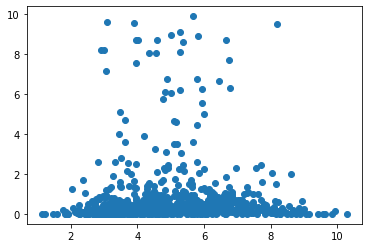

In [1]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline

spectra = pd.read_csv('spectra.dat', delimiter=' ', header=None)
galaxy_properties = pd.read_csv('galaxy_properties.csv', index_col = 0)
tau = galaxy_properties['tauGyr']

X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.loc[i]))

plt.scatter(X, tau)

In [2]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.svm import SVR

X_train, X_test, y_train, y_test = train_test_split(spectra, tau, random_state=101)
model = SVR(kernel='rbf', verbose=True)
model.fit(X_train, y_train)
mean_squared_error(model.predict(X_test), y_test)

[LibSVM]

2.0561242619353517

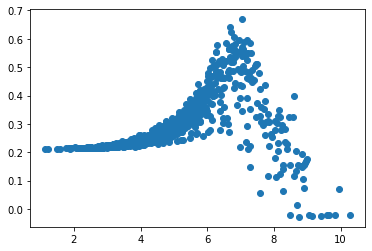

In [9]:
X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.loc[i]))

plt.scatter(X, model.predict(spectra))

In [10]:


svr = SVR(verbose=True)
cv = KFold(n_splits=5, shuffle=True, random_state=101)

params = {
    'C': np.arange(1, 15, 1),
    'kernel': ['rbf'],
    'gamma': ['auto', 'scale', 0.01, 0.05, 0.1, 1.0, 10]
}


model = GridSearchCV(svr, params, cv = cv, verbose=5, n_jobs=-3, return_train_score=True, scoring='r2')
model.fit(spectra, tau)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-3)]: Done   6 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-3)]: Done  60 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-3)]: Done 150 tasks      | elapsed:   43.4s
[Parallel(n_jobs=-3)]: Done 276 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-3)]: Done 438 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-3)]: Done 490 out of 490 | elapsed:  2.3min finished


[LibSVM]Best params, best score: 0.0892 {'C': 8, 'gamma': 1.0, 'kernel': 'rbf'}


In [11]:
bm = model.best_estimator_

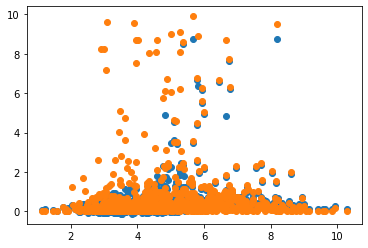

In [12]:
plt.scatter(X, bm.predict(spectra))
plt.scatter(X, tau)

In [13]:
mean_squared_error(bm.predict(spectra), tau)

0.9913705424596034

In [14]:
tau

idx
0      0.033035
1      0.087146
2      1.273974
3      0.242588
4      0.510683
         ...   
995    2.069916
996    0.062845
997    0.918643
998    0.168273
999    3.523973
Name: tauGyr, Length: 1000, dtype: float64

In [15]:
np.mean(tau)

0.6589413052719825

In [16]:
np.median(tau)


0.2335401645928588

In [3]:
#optimizing SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

cv = KFold(n_splits=5, shuffle=True, random_state=101)

piped_model = make_pipeline(StandardScaler(), SVR()) 

parameters = {'svr__kernel':['rbf'],
              'svr__gamma':[1.0, 5, 10, 12, 13, 15, 20],
              'svr__C':[0.1, 1.0, 5, 10, 50, 100],
              #'svr__degree': [1, 2, 4, 8],
             }

model = GridSearchCV(piped_model, parameters, cv = cv, verbose = 2, n_jobs = -4, return_train_score=True, scoring='neg_mean_squared_error')
model.fit(spectra,tau)

print('Best params, best score:', "{:.4f}".format(model.best_score_), \
      model.best_params_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-4)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=-4)]: Done  31 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-4)]: Done 152 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-4)]: Done 210 out of 210 | elapsed:  1.2min finished


Best params, best score: -1.8399 {'svr__C': 10, 'svr__gamma': 15, 'svr__kernel': 'rbf'}


In [4]:
bm = model.best_estimator_
print(r2_score(bm.predict(spectra), tau))
print(mean_squared_error(bm.predict(spectra), tau))

0.6356357462731788
0.4834158776740487
